In [1]:
#Notebook GPU Comparison

In [1]:
#Libraries
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import subprocess
import numpy as np

In [43]:
#Name Lists
stencil_name_list = [

        "laplacian1d", 
        "laplacian2d",
        "laplacian3d",
        "FMA",
       "lapoflap1d",
        "lapoflap2d",
        "lapoflap3d",
    ]

backend_list = [ "cupy",
                "gt4py", 
                "numba_cuda"
                ]

gt4py_backend = ["gtcuda"]

numba_cudadevice = [True,False]








In [27]:
# uncomment out if you want to create new validation fields
for x in stencil_name_list:
    
    bashCommand=f"/users/course13/HPC4WC_venv2/bin/python stencil_main_validation.py --nx 4 --ny 4 --nz 4 --stencil_name {x} --backend numpy --create_field True --field_name {x}"
    process = subprocess.Popen(bashCommand.split(), stdout=subprocess.PIPE,stderr=subprocess.PIPE)
    output, error = process.communicate()
    
    print(output.decode("utf-8"))
    #print(error.decode("utf-8"))

New output field laplacian1d saved.

New output field laplacian2d saved.

New output field laplacian3d saved.

New output field FMA saved.

New output field lapoflap1d saved.

New output field lapoflap2d saved.

New output field lapoflap3d saved.



In [28]:
#only two conditions have to be additionally evaluated: cupy and gt4py_gtcuda

#Testfields
for x in stencil_name_list:
    print(x,':')
    for y in ["gt4py","cupy","numba"]:
        
        if y=='gt4py':
            if x=='test':
                print('There is no test stencil in gt4py.')
            else:
                for z in ['gtcuda']:
                    bashCommand=f"/users/course13/HPC4WC_venv2/bin/python stencil_main_validation.py --nx 4 --ny 4 --nz 4 --stencil_name {x} --backend {y} --gt4py_backend gtcuda --create_field False --field_name {x}"
                    process = subprocess.Popen(bashCommand.split(), stdout=subprocess.PIPE)
                    output, error = process.communicate()
                    print(output.decode("utf-8"),' for ', z)
         
        elif y=='cupy':
            bashCommand=f"/users/course13/HPC4WC_venv2/bin/python stencil_main_validation.py --nx 4 --ny 4 --nz 4 --stencil_name {x} --backend {y} --create_field False --field_name {x}"
            process = subprocess.Popen(bashCommand.split(), stdout=subprocess.PIPE)
            output, error = process.communicate()
            print(output.decode("utf-8"),' for cupy')
            
        else:
            for device in [True,False]:
                bashCommand=f"/users/course13/HPC4WC_venv2/bin/python stencil_main_validation.py --nx 4 --ny 4 --nz 4 --stencil_name {x} --backend numba_cuda --numba_cudadevice {device} --create_field False --field_name {x}"
                process = subprocess.Popen(bashCommand.split(), stdout=subprocess.PIPE)
                output, error = process.communicate()
                print(output.decode("utf-8"),' for ', device)
        #else:
         ##   bashCommand=f"python3 stencil_main_validation.py --nx 32 --ny 32 --nz 32 --stencil_name {x} --backend cupy --create_field False --field_name {x}"
          #  process = subprocess.Popen(bashCommand.split(), stdout=subprocess.PIPE)
          #  output, error = process.communicate()
          #  print(output.decode("utf-8"),' for cupy')


laplacian1d :
Field validation for stencil laplacian1d in backend gt4py is: True.
  for  gtcuda
  for cupy
Field validation for stencil laplacian1d in backend numba_cuda is: True.
  for  True
Field validation for stencil laplacian1d in backend numba_cuda is: True.
  for  False
laplacian2d :
Field validation for stencil laplacian2d in backend gt4py is: True.
  for  gtcuda
  for cupy
Field validation for stencil laplacian2d in backend numba_cuda is: True.
  for  True
Field validation for stencil laplacian2d in backend numba_cuda is: True.
  for  False
laplacian3d :

Oooops! GridTools sources have not been installed!
Install them manually in '/users/course13/gt4py/src/gt4py/_external_src/'

	Example: git clone --depth 1 -b release_v1.1 https://github.com/GridTools/gridtools.git

  for  gtcuda
  for cupy
Field validation for stencil laplacian3d in backend numba_cuda is: True.
  for  True
Field validation for stencil laplacian3d in backend numba_cuda is: True.
  for  False
FMA :
Field valid

## Timing
### Execute Stencil computation for evaluation
In this section the different stencils for the different domain sizes are calculated.


In [2]:
!module unload PyExtensions/3.6.5.7-CrayGNU-19.10

In [16]:
#this actually only worked partially, I executed part of the df GPU2 in the console
stencil_name_list = [
        #"test",
        "laplacian1d", 
        "laplacian2d",
        "laplacian3d",
        "FMA",
        "lapoflap1d",
        "lapoflap2d",
        "lapoflap3d",
    ]
#Parameter 
field_size_list = [64,128,256,512]
df_name = "GPU2" #Name of evaluation dataframe
num_iter = 20
#stencil_name_list = ["lapoflap2d","lapoflap3d"]

#Stencil computation for all options of numba
for size in field_size_list:
    print(size,':')
    #only two conditions have to be additionally evaluated: cupy and gt4py_gtcuda


    for x in stencil_name_list:
        print(x,':')
        for y in ["gt4py"]:
        
            if y=='gt4py':
                for z in ['gtcuda']:
                    bashCommand=f"/users/course13/HPC4WC_venv2/bin/python stencil_main_performance.py --nx {size} --ny {size} --nz {size} --stencil_name {x} --backend {y} --gt4py_backend gtcuda --num_iter {num_iter} --df_name {df_name}"
                    process = subprocess.Popen(bashCommand.split(), stdout=subprocess.PIPE)
                    output, error = process.communicate()
                    print(x,' for gtcuda ')
                    #print(error)
         
            if y=='cupy':
                bashCommand=f"/users/course13/HPC4WC_venv2/bin/python3 stencil_main_performance.py --nx {size} --ny {size} --nz {size} --stencil_name {x} --backend {y} --num_iter {num_iter} --field_name {x} --df_name {df_name}"
                process = subprocess.Popen(bashCommand.split(), stdout=subprocess.PIPE)
                output, error = process.communicate()
                print(x,' for cupy ')
                print(error)

            else:
                for device in [True,False]:
                    bashCommand=f"/users/course13/HPC4WC_venv2/bin/python stencil_main_performance.py --nx {size} --ny {size} --nz {size} --stencil_name {x} --backend numba_cuda --numba_cudadevice {device} --num_iter {num_iter} --field_name {x} --df_name {df_name}"
                    process = subprocess.Popen(bashCommand.split(), stdout=subprocess.PIPE)
                    output, error = process.communicate()
                    print(x,' for numba cubadevice ',device)
        #else:
         ##   bashCommand=f"python3 stencil_main_validation.py --nx 32 --ny 32 --nz 32 --stencil_name {x} --backend cupy --create_field False --field_name {x}"
          #  process = subprocess.Popen(bashCommand.split(), stdout=subprocess.PIPE)
          #  output, error = process.communicate()
          #  print(output.decode("utf-8"),' for cupy')


64 :
laplacian1d :
laplacian1d  for gtcuda 
laplacian1d  for numba cubadevice  True
laplacian1d  for numba cubadevice  False
laplacian2d :
laplacian2d  for gtcuda 
laplacian2d  for numba cubadevice  True
laplacian2d  for numba cubadevice  False
laplacian3d :
laplacian3d  for gtcuda 
laplacian3d  for numba cubadevice  True
laplacian3d  for numba cubadevice  False
FMA :
FMA  for gtcuda 
FMA  for numba cubadevice  True
FMA  for numba cubadevice  False
lapoflap1d :
lapoflap1d  for gtcuda 
lapoflap1d  for numba cubadevice  True
lapoflap1d  for numba cubadevice  False
lapoflap2d :
lapoflap2d  for gtcuda 
lapoflap2d  for numba cubadevice  True
lapoflap2d  for numba cubadevice  False
lapoflap3d :
lapoflap3d  for gtcuda 
lapoflap3d  for numba cubadevice  True
lapoflap3d  for numba cubadevice  False
128 :
laplacian1d :
laplacian1d  for gtcuda 
laplacian1d  for numba cubadevice  True
laplacian1d  for numba cubadevice  False
laplacian2d :
laplacian2d  for gtcuda 
laplacian2d  for numba cubadevice 

In [25]:
df_name = "GPU2" #Name of df to evaluate
df = pd.read_pickle("eval/{}_result.pkl".format(df_name))
df

#df_plot=df[((df.backend=="cupy"))]
df_plot_lapoflap3d=df[((df.backend=="cupy")& (df.stencil_name=="lapoflap3d") )]
#df_plot_lapoflap3d

df_plot_lapoflap3d_gt4py=df[((df.backend=="gt4py")& (df.stencil_name=="lapoflap3d") )]

df_plot_lapoflap3d_gt4py=df_plot_lapoflap3d_gt4py.drop([115])
df_plot_lapoflap3d_gt4py=df_plot_lapoflap3d_gt4py.sort_values(by=['nx']).reset_index(drop=True)

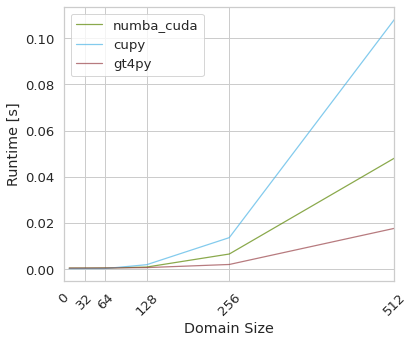

In [45]:
h = plt.figure(figsize=(6, 5))
gs = h.add_gridspec(1, 1)
xs=[0,1,2,3,4,5,6]
with sns.axes_style("whitegrid"):
    sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 1.25})
    ax = h.add_subplot(gs[0, 0])
    #plt.xticks(xs,(8,16,32,64,128,256,512))
    #plt.xticks(rotation=45)
    #plt.xlim((0,6))

    for stencil in ["lapoflap3d"]:
            #sns.set_context("talk")
            #sns.set()
            #plt.figure(figsize=(10,5))
            #plt.title(stencil)
            #plt.yscale("log")

            plt.xticks((0,32,64,128,256,512))
            plt.xticks(rotation=45)
            plt.xlim((0,512))
            df_numpy = df[((df.stencil_name==stencil)&(df.backend=="numpy"))]
            for z in ["numba_cuda"]:
                df_plot=df[((df.backend==z)& (df.stencil_name==stencil))]

                plt.plot(df_plot["nx"],df_plot["run_avg"].values,"-",label="numba_cuda",alpha=0.7,color='#598500')
                #df_plot=df[((df.numba_parallel==False)& (df.stencil_name==stencil) & (df.backend==backend))]
                #plt.plot(df_plot["nx"],df_numpy["run_avg"]/df_plot["run_avg"].values,"o--",label="{} {} default".format(stencil,backend),alpha=0.8)   

            plt.plot(df_plot_lapoflap3d["nx"],df_plot_lapoflap3d["run_avg"],label="cupy",alpha=0.7,color='#4FB5E6')

            plt.plot(df_plot_lapoflap3d_gt4py["nx"],df_plot_lapoflap3d_gt4py["run_avg"],label="gt4py",alpha=0.7,color='#994349')
            #plt.plot(df_plot_lapoflap3d_gt4py["nx"],df_plot_lapoflap3d_gt4py["run_avg"],label="gt4py")
    plt.legend()
    plt.ylabel('Runtime [s]')
    plt.xlabel('Domain Size')

    plt.tight_layout()

    plt.savefig('GPU.png',dpi=300)
